<a href="https://colab.research.google.com/github/lucasribeirog/Ola-Mundo/blob/main/Python_zero_to_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações, cargas e configurações

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
from geopy.geocoders import Nominatim
from google.colab import files
import ipywidgets as widgets
from ipywidgets import fixed

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
file = 'kc_house_data.csv'
data = pd.read_csv(file)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180.00,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170.00,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770.00,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050.00,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680.00,0,1987,0,98074,47.62,-122.05,1800,7503


# Aula 01

## Exercícios propostos

01. Quantas casas estão disponíveis para compra?
R: 21613
02. Quantos atributos as casas possuem?
R: 21
03. Quais são os atributos das casas?
R: id, data, preço, quartos, banheiros, ... 
04. Qual a casa mais cara (casa com o maior valor de venda)?
R: a casa com o ID 6762700020
05. Qual a casa com o maior número de quartos?
R: A caso com ID 2402100895
06. Qual a soma total de quartos do conjunto de dados?
R:
07. Quantas casas possuem 2 banheiros?
R: 1930
08. Qual o preço médio de todas as casas no conjunto de dados?

09. Qual o preço médio de casas com 2 banheiros?

10. Qual o preço mínimo entre as casas com 3 quartos?

11. Quantas casas possuem mais de 300 metros quadrados?

### Quantas casas estão disponíveis para venda?

In [ ]:
available_houses = data.shape[0]
print(f'Casas disponíveis para venda: {available_houses}')

Casas disponíveis para venda: 21613


### Quantos atributos as casas possuem?

In [ ]:
houses_attr = data.shape[1]
print(f'As casas possuem {houses_attr} atributos')

As casas possuem 21 atributos


### Quais são os atributos das casas?

In [ ]:
data.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

### Qual a casa mais cara (casa com o maior valor de venda)?

In [ ]:
print('A casa mais cara é:')
data[['id', 'price']].sort_values('price', ascending=False).head(1)

A casa mais cara é:


,id,price
7252,6762700020,7700000.00


### Qual a casa com o maior número de quartos?

In [ ]:
print('A casa com maior número de quartos é:')
data[['id', 'bedrooms']].sort_values('bedrooms', ascending=False).head(1)

A casa com maior número de quartos é:


,id,bedrooms
15870,2402100895,33


### Qual a soma total de quartos do conjunto de dados?

In [ ]:
bedrooms_sum = data['bedrooms'].sum()
print(f'Total de quartos do dataset é: {bedrooms_sum}')

Total de quartos do dataset é: 72854


### Quantas casas possuem 2 banheiros?

In [ ]:
houses_2_bedrooms = data[data['bathrooms'] == 2].shape[0]
print(f'{houses_2_bedrooms} possuem 2 banheiros')

1930 possuem 2 banheiros


### Qual o preço médio de todas as casas no conjunto de dados?

In [ ]:
avg_price = data['price'].mean()
print(f'Preço médio das casas: {avg_price:.2f}')

Preço médio das casas: 540088.14


### Qual o preço médio de casas com 2 banheiros?

In [ ]:
houses_2_bathrooms = data[data['bathrooms'] == 2]
avg_price_2_bathrooms = houses_2_bathrooms['price'].mean()
print(f'Preço médio de casas com 2 banheiros: {avg_price_2_bathrooms:.2f}')

Preço médio de casas com 2 banheiros: 457889.72


### Qual o preço mínimo entre as casas com 3 quartos?

In [ ]:
houses_3_bedrooms = data[data['bedrooms'] == 3]
min_price_3_bedrooms = houses_3_bedrooms['price'].min()
print(f'Menor preço entre as casas com 3 quartos: {min_price_3_bedrooms:.2f}')

Menor preço entre as casas com 3 quartos: 82000.00


### Quantas casas possuem mais de 300 metros quadrados de sala de estar?

In [ ]:
# Convertion: 1 m => 3,28084 ft
m_to_ft = 300 * 3.28084
m_living = data[data['sqft_living'] > m_to_ft].shape[0]
print(f'{m_living} possuem mais de 300 m² na sala de estar')

20248 possuem mais de 300 m² na sala de estar


### Quantas casas tem mais de 2 andares?

In [ ]:
three_floors_plus = data[data['floors'] > 2]
houses_3_floors_plus = three_floors_plus.shape[0]
print(f'{houses_3_floors_plus} casas possuem mais de 2 andares')

782 casas possuem mais de 2 andares


### Quantas casas tem vista para o mar?

In [ ]:
is_waterfront = data[data['waterfront'] == 1]
houses_waterfront = is_waterfront.shape[0]
print(f'{houses_waterfront} casas possuem vista para o mar')

163 casas possuem vista para o mar


### Das casas com vista para o mar, quantas tem 3 quartos?

In [ ]:
waterfront_3_bedrooms = is_waterfront[is_waterfront['bedrooms'] == 3].shape[0]
print(f'{waterfront_3_bedrooms} casas possuem vista para o mar e 3 quartos')

64 casas possuem vista para o mar e 3 quartos


### Das casa com mais de 300 m de sala de estar, quantas tem mais de 2 banheiros?

In [ ]:
house_300_meters = data[data['sqft_living'] > m_to_ft]
house_300_m_2_bathrooms = house_300_meters[house_300_meters['bathrooms'] > 2].shape[0]
print(f'{house_300_m_2_bathrooms} casas possuem mais de 300 m² e mais de 2 banheiros')

11230 casas possuem mais de 300 m² e mais de 2 banheiros


In [ ]:
%%timeit
df = data
df['size_in_meters'] = df['price'] * 3.28084

The slowest run took 6.57 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 493 µs per loop


In [ ]:
%%timeit
df = data
df.size_in_meters = df.price * 3.28084

The slowest run took 7.52 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 578 µs per loop


# Aula 02

## Exercícios propostos

01. Crie uma nova coluna chamada: 'house_age' : OK
  - Se o valor da coluna 'date' for maior que 2014-01-01 => 'new_house' - OK
  - Se o valor da coluna 'date' for menor que 2014-01-01 => 'old_house' - OK

02. Crie uma nova coluna chamada: 'dormitory_type': OK
  - Se o valor da coluna 'bedrooms' for igual a 1 => 'studio':OK
  - Se o valor da coluna 'bedrooms' for igual a 2 => 'apartament':OK
  - Se o valor da coluna 'bedrooms' for maior que 2 => 'house':OK

03. Crie uma nova coluna chamada: 'condition_type':OK
  - Se o valor da coluna 'condition' for menor ou igual a 2 => 'bad':OK
  - Se o valor da coluna 'condition' for igual a 3 ou 4 => 'regular':OK
  - Se o valor da coluna 'condition' for igual a 5 => 'good':OK

04. Modifique o TIPO da coluna 'condition' para STRING: ok

05. Delete as colunas: 'sqft_living' e 'sqft_lot': ok

06. Modifique o TIPO da coluna 'yr_build' para 'DATE':ok

07. Modifique o tipo da coluna 'yr_renovated' para 'DATE'

08. Qual a data mais antiga de construção de um imóvel?: 1900-01-01

09. Qual a data mais antiga de renovação de um imóvel?:1934-01-01

10. Quantos imóveis tem 2 andares?:8241

11. Quantos imóveis estão com a condição igual a 'regular'?19710

12. Quantos imóveis estão com a condição igual a 'bad' possuem vista para a água?:2

13. Quantos imóveis estão com a condição igual a 'good' e são 'new_house'?:1701

14. Qual o valor do imóvel mais caro do tipo 'studio'?: US = 1247000.0

15. Quantos imóveis do tipo 'apartament' foram reformados em 2015?:0

16. Qual o maior 'número' de quartos que um imóvel do tipo 'house' possui?:33

17. Quantos imóveis 'new_house' foram reformados no ano de 2014?91

18. Selecione as colunas: 'id', 'date', 'price', 'floors' e 'zipcode' pelo método:
  - Direto pelo nome das colunas
  - Pelos índices
  - Pelos índices das linhas e o nome das colunas
  - Índices booleanos

19. Salve um arquivo .csv com somente as colunas do item 10 ao 17.

20. Modifique a cor dos pontos no mapa de 'pink' para 'verde-escuro'

### Crie uma nova coluna chamada: 'house_age'
  - Se o valor da coluna 'date' for maior que 2014-01-01 => 'new_house'
  - Se o valor da coluna 'date' for menor que 2014-01-01 => 'old_house'

In [ ]:
data['date'] = pd.to_datetime(data['date'])
new_house_cut = pd.to_datetime('2014-01-01')
data['house_age'] = data['date'].apply(lambda x: 'new_house' if x >= new_house_cut else 'old_house')

### Crie uma nova coluna chamada: 'dormitory_type'
  - Se o valor da coluna 'bedrooms' for igual a 1 => 'studio'
  - Se o valor da coluna 'bedrooms' for igual a 2 => 'apartament'
  - Se o valor da coluna 'bedrooms' for maior que 2 => 'house'

In [ ]:
data['dormitory_type'] = data['bedrooms'].apply(lambda x: 'studio' if x == 1 else 'apartament' if x == 2 else 'house')
data[['id', 'bedrooms', 'dormitory_type']].head(15)

,id,bedrooms,dormitory_type
0,7129300520,3,house
1,6414100192,3,house
2,5631500400,2,apartament
3,2487200875,4,house
4,1954400510,3,house
5,7237550310,4,house
6,1321400060,3,house
7,2008000270,3,house
8,2414600126,3,house
9,3793500160,3,house


### Crie uma nova coluna chamada: 'condition_type'
  - Se o valor da coluna 'condition' for menor ou igual a 2 => 'bad'
  - Se o valor da coluna 'condition' for igual a 3 ou 4 => 'regular'
  - Se o valor da coluna 'condition' for igual a 5 => 'good'

In [ ]:
data['condition_type'] = data['condition'].apply(lambda x: 'bad' if x <= 2 else 'regular' if (x == 3 or x == 4) else 'good')
data[['condition', 'condition_type']].head(15)

,condition,condition_type
0,3,regular
1,3,regular
2,3,regular
3,5,good
4,3,regular
5,3,regular
6,3,regular
7,3,regular
8,3,regular
9,3,regular


### Modifique o TIPO da coluna 'condition' para STRING

In [ ]:
data.condition = data.condition.astype('str')
data.condition.dtype

dtype('O')

### Delete as colunas: 'sqft_living' e 'sqft_lot'

In [ ]:
drop_cols = ['sqft_living15', 'sqft_lot15']
data.drop(drop_cols, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  int64         
 1   date            21613 non-null  datetime64[ns]
 2   price           21613 non-null  float64       
 3   bedrooms        21613 non-null  int64         
 4   bathrooms       21613 non-null  float64       
 5   sqft_living     21613 non-null  int64         
 6   sqft_lot        21613 non-null  int64         
 7   floors          21613 non-null  float64       
 8   waterfront      21613 non-null  int64         
 9   view            21613 non-null  int64         
 10  condition       21613 non-null  object        
 11  grade           21613 non-null  int64         
 12  sqft_above      21611 non-null  float64       
 13  sqft_basement   21613 non-null  int64         
 14  yr_built        21613 non-null  int64         
 15  yr

### Modifique o TIPO da coluna 'yr_build' para 'DATE'

In [ ]:
data.yr_built = pd.to_datetime(data.yr_built, format='%Y')
data.yr_built.dtype

dtype('<M8[ns]')

### Modifique o tipo da coluna 'yr_renovated' para 'DATE'

In [ ]:
data.yr_renovated = pd.to_datetime(data.yr_renovated, format='%Y', errors='coerce')
data.yr_renovated.dtype

dtype('<M8[ns]')

### Qual a data mais antiga de construção de um imóvel?

In [ ]:
print(f'Data mais antiga: {data.yr_built.min()}')

Data mais antiga: 1900-01-01 00:00:00


### Qual a data mais antiga de renovação de um imóvel?

In [ ]:
print(f'Data mais antiga de Renovação: {data.yr_renovated.min()}')

Data mais antiga de Renovação: 1934-01-01 00:00:00


### Quantos imóveis tem 2 andares?

In [ ]:
print(f'Existem {data.floors[data.floors == 2].count()} imóveis com 2 andares')

Existem 8241 imóveis com 2 andares


### Quantos imóveis estão com a condição igual a 'regular'?

In [ ]:
print(f'Existem {data.condition_type[data.condition_type == "regular"].count()} imóveis na condição "regular"')

Existem 19710 imóveis na condição "regular"


### Quantos imóveis estão com a condição igual a 'bad' possuem vista para a água?

In [ ]:
print(f'Existem {data.id[(data.waterfront == 1) & (data.condition_type == "bad")].count()} imóveis em condição "ruim" com vista para a água')

Existem 2 imóveis em condição "ruim" com vista para a água


### Quantos imóveis estão com a condição igual a 'good' e são 'new_house'?

In [ ]:
print(f'Existem {data.id[(data.house_age == "new_house") & (data.condition_type == "bad")].count()} imóveis em condição "boa" e "nova"')

Existem 202 imóveis em condição "boa" e "nova"


### Qual o valor do imóvel mais caro do tipo 'studio'?

In [ ]:
print(f'{data.price[data.dormitory_type == "studio"].max():,.02f} é o valor do "studio" mais caro')

1,247,000.00 é o valor do "studio" mais caro


### Quantos imóveis do tipo 'apartament' foram reformados em 2015?

In [ ]:
print(f'{data.id[(data.dormitory_type == "apartament") & (data.yr_renovated.dt.year == 2015)].count()} "apartamentos" reformados em 2015')

0 "apartamentos" reformados em 2015


### Qual o maior 'número' de quartos que um imóvel do tipo 'house' possui?

In [ ]:
print(f'{data.bedrooms[data.dormitory_type == "house"].max()} é o maior número de quartos de uma "casa"')

33 é o maior número de quartos de uma "casa"


### Quantos imóveis 'new_house' foram reformados no ano de 2014?

In [ ]:
print(f'{data.id[(data.house_age == "new_house") & (data.yr_renovated.dt.year == 2014)].count()} "casas novas" foram reformadas em 2014')

91 "casas novas" foram reformadas em 2014


### Selecione as colunas: 'id', 'date', 'price', 'floors' e 'zipcode' pelo método:

- Direto pelo nome das colunas
- Pelos índices
- Pelos índices das linhas e o nome das colunas
- Índices booleanos

In [ ]:
cols = ['id', 'date', 'price', 'floors', 'zipcode']
data[cols].head(3)

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.00,1.00,98178
1,6414100192,2014-12-09,538000.00,2.00,98125
2,5631500400,2015-02-25,180000.00,1.00,98028


In [ ]:
indices = [0, 1, 2, 7, 16]
data.iloc[:3, indices]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.00,1.00,98178
1,6414100192,2014-12-09,538000.00,2.00,98125
2,5631500400,2015-02-25,180000.00,1.00,98028


In [ ]:
data.loc[:2, cols]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.00,1.00,98178
1,6414100192,2014-12-09,538000.00,2.00,98125
2,5631500400,2015-02-25,180000.00,1.00,98028


In [ ]:
boolean = []
for c in data.columns:
  if c in cols:
    boolean.append(True)
  else:
    boolean.append(False)
data.loc[:2, boolean]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.00,1.00,98178
1,6414100192,2014-12-09,538000.00,2.00,98125
2,5631500400,2015-02-25,180000.00,1.00,98028


### Salve um arquivo .csv com somente as colunas do item 10.

In [ ]:
data.loc[10:10, :].to_csv('../content/item_10', index=False)

### Modifique a cor dos pontos no mapa de 'pink' para 'verde-escuro'

In [ ]:
df_map = data[['id', 'lat', 'long', 'price']]

map = px.scatter_mapbox(df_map, lat='lat', lon='long', hover_name='id', hover_data=['price'], color_discrete_sequence=['darkgreen'], zoom=8, height=300)
map.update_layout(mapbox_style='open-street-map')
map.update_layout(height=500, margin={'r':0, 't':0, 'l':0, 'b':0})
map.show()

# Aula 03

## Exercícios propostos

01. Crie uma nova coluna chamada 'dormitory_type':
  - Se o valor da coluna 'bedrooms' for igual a 1 => 'studio'
  - Se o valor da coluna 'bedrooms' for igual a 2 => 'apartament'
  - Se o valor da coluna 'bedrooms' for maior que 2 => 'house'

02. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos

03. Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis

04. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios

05. Faça um gráfico de linhas que mostre a evolução da média dos preços pelo ano da reforma dos imóveis a partir do ano de 1930

06. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitório dos imóveis

07. Crie um Dashboard com os gráficos das questões 02, 03 e 04 ( Dashboard: 1 Linha e 2 Colunas)

08. Crie um Dashboard com os fráficos das perguntas 02 e 04 (Dashboard: 2 Colunas)

09. Crie um Dashboard com os gráficos das perguntas 03 e 05 (Dashboard: 2 Linhas)

10. Faça um gráfico (mapa) com o tamanho dos pontos sendo igual ao tamanho da sala de estar

### Crie uma nova coluna chamada 'dormitory_type':
  - Se o valor da coluna 'bedrooms' for igual a 1 => 'studio'
  - Se o valor da coluna 'bedrooms' for igual a 2 => 'apartament'
  - Se o valor da coluna 'bedrooms' for maior que 2 => 'house'

In [ ]:
data.dormitory_type = data.bedrooms.apply(lambda x: 'studio' if x == 1 else 'apartament' if x == 2 else 'house')

### Faça um gráfico de barras que represente a soma dos preços pelo número de quartos

<BarContainer object of 13 artists>

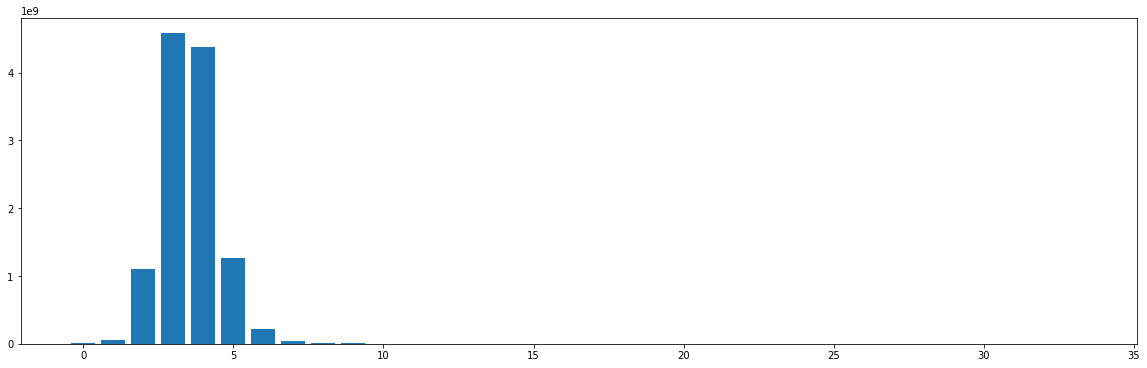

In [ ]:
price_bedrooms = data[['bedrooms', 'price']].groupby('bedrooms').sum().reset_index()
plt.figure(figsize=(20, 6))
plt.bar(price_bedrooms['bedrooms'], price_bedrooms['price'])

### Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis

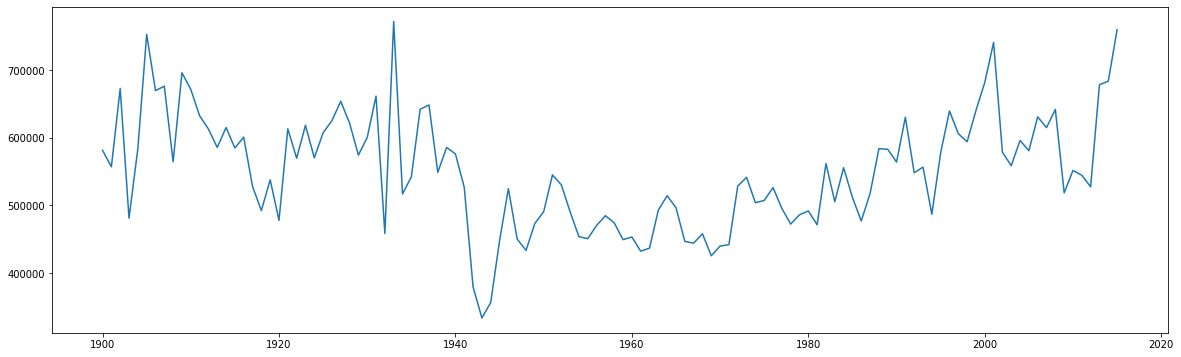

In [ ]:
data['year_built'] = data.yr_built.dt.year
avgprice_yrbuilt = data[['year_built', 'price']].groupby('year_built').mean().reset_index()
plt.figure(figsize=(20, 6))
plt.plot(avgprice_yrbuilt.year_built, avgprice_yrbuilt.price)

### Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios

<BarContainer object of 3 artists>

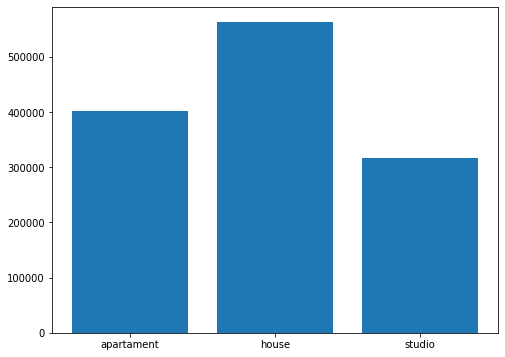

In [ ]:
dormitory_price = data[['dormitory_type', 'price']].groupby('dormitory_type').mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(dormitory_price.dormitory_type, dormitory_price.price)

### Faça um gráfico de linhas que mostre a evolução da média dos preços pelo ano da reforma dos imóveis a partir do ano de 1930

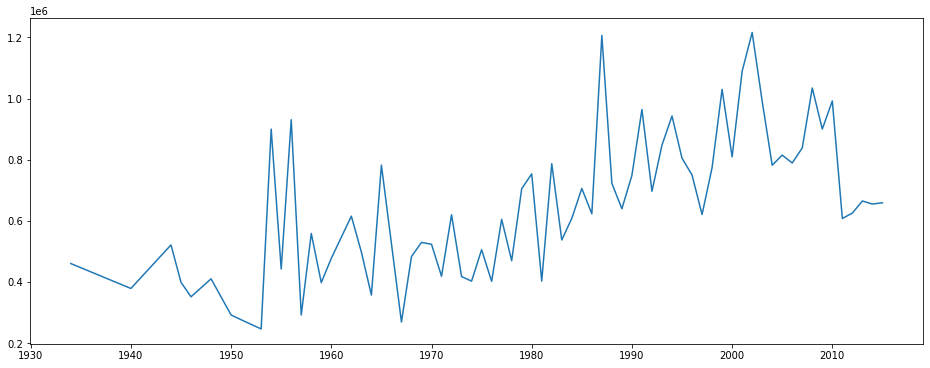

In [ ]:
data['year_reno'] = data.yr_renovated.dt.year
price_evolution = data[['year_reno', 'price']].loc[data.year_reno >= 1930]
price_evolution = price_evolution.groupby('year_reno').mean().reset_index()

plt.figure(figsize=(16, 6))
plt.plot(price_evolution.year_reno, price_evolution.price)

### Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitório dos imóveis

In [ ]:
data[['year_built', 'dormitory_type', 'price']].groupby(['year_built', 'dormitory_type']).mean().reset_index()

,year_built,dormitory_type,price
0,1900,apartament,589533.33
1,1900,house,584854.27
2,1900,studio,398944.00
3,1901,apartament,452856.40
4,1901,house,578619.17
...,...,...,...
300,2014,house,692687.72
301,2014,studio,516500.00
302,2015,apartament,543250.00
303,2015,house,797383.06


### Crie um Dashboard com os gráficos das questões 02, 03 e 04 ( Dashboard: 1 Linha e 2 Colunas)

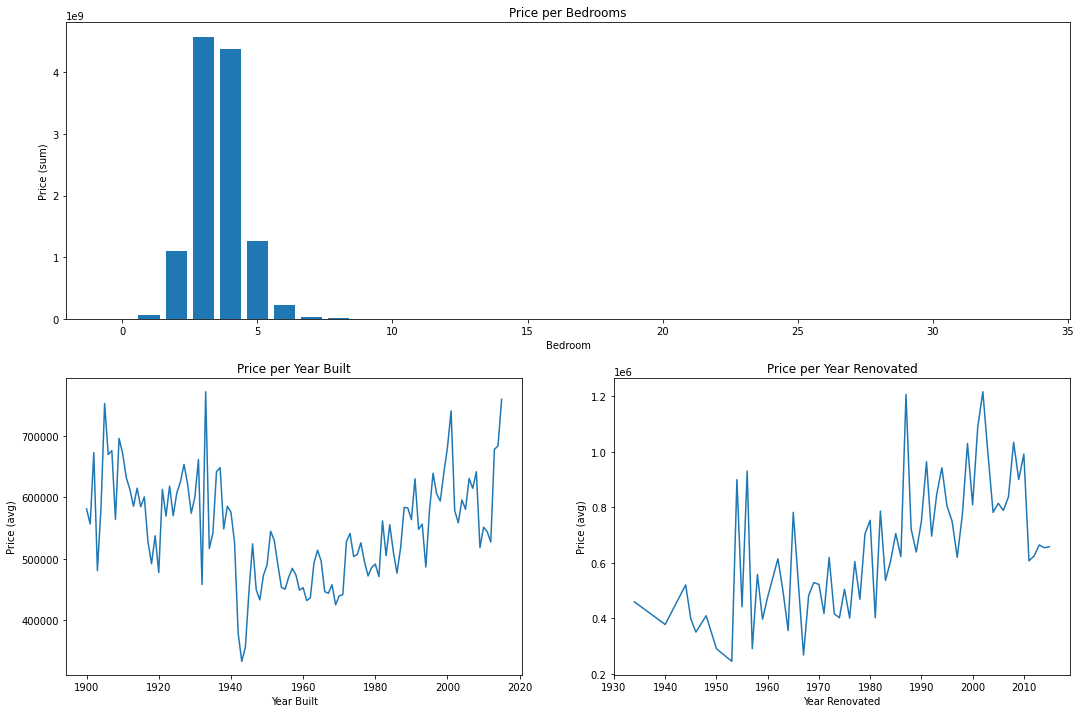

In [ ]:
fig = plt.figure(figsize=(18, 12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, 0])
ax3 = fig.add_subplot(specs[1, 1])

# First Graph
ax1.bar(price_bedrooms['bedrooms'], price_bedrooms['price'])
ax1.set_xlabel('Bedroom')
ax1.set_ylabel('Price (sum)')
ax1.set_title('Price per Bedrooms')

# Second Graph
ax2.plot(avgprice_yrbuilt.year_built, avgprice_yrbuilt.price)
ax2.set_xlabel('Year Built')
ax2.set_ylabel('Price (avg)')
ax2.set_title('Price per Year Built')

# Third Graph
ax3.plot(price_evolution.year_reno, price_evolution.price)
ax3.set_xlabel('Year Renovated')
ax3.set_ylabel('Price (avg)')
ax3.set_title('Price per Year Renovated')

fig.show()

### Crie um Dashboard com os fráficos das perguntas 02 e 04 (Dashboard: 2 Colunas)

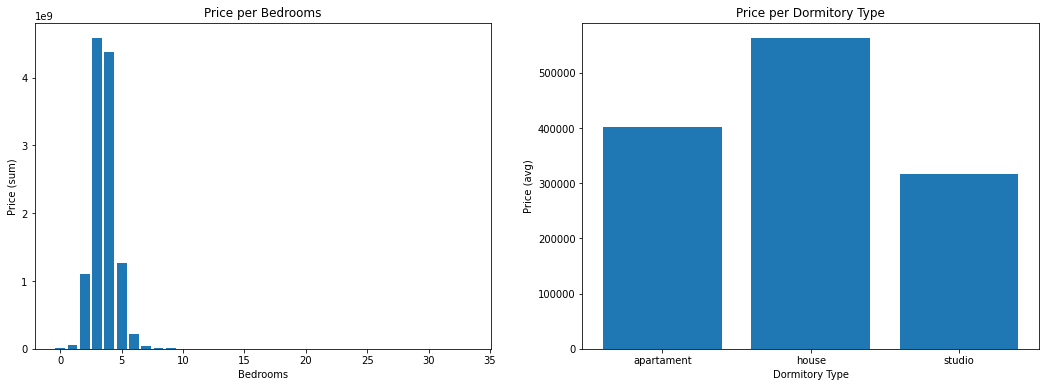

In [ ]:
fig = plt.figure(figsize=(18, 6))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[:, 0])
ax2 = fig.add_subplot(specs[:, 1])

# First Graph
ax1.bar(price_bedrooms.bedrooms, price_bedrooms.price)
ax1.set_xlabel('Bedrooms')
ax1.set_ylabel('Price (sum)')
ax1.set_title('Price per Bedrooms')

# Second Graph
ax2.bar(dormitory_price.dormitory_type, dormitory_price.price)
ax2.set_xlabel('Dormitory Type')
ax2.set_ylabel('Price (avg)')
ax2.set_title('Price per Dormitory Type')

fig.show()

### Crie um Dashboard com os gráficos das perguntas 03 e 05 (Dashboard: 2 Linhas)

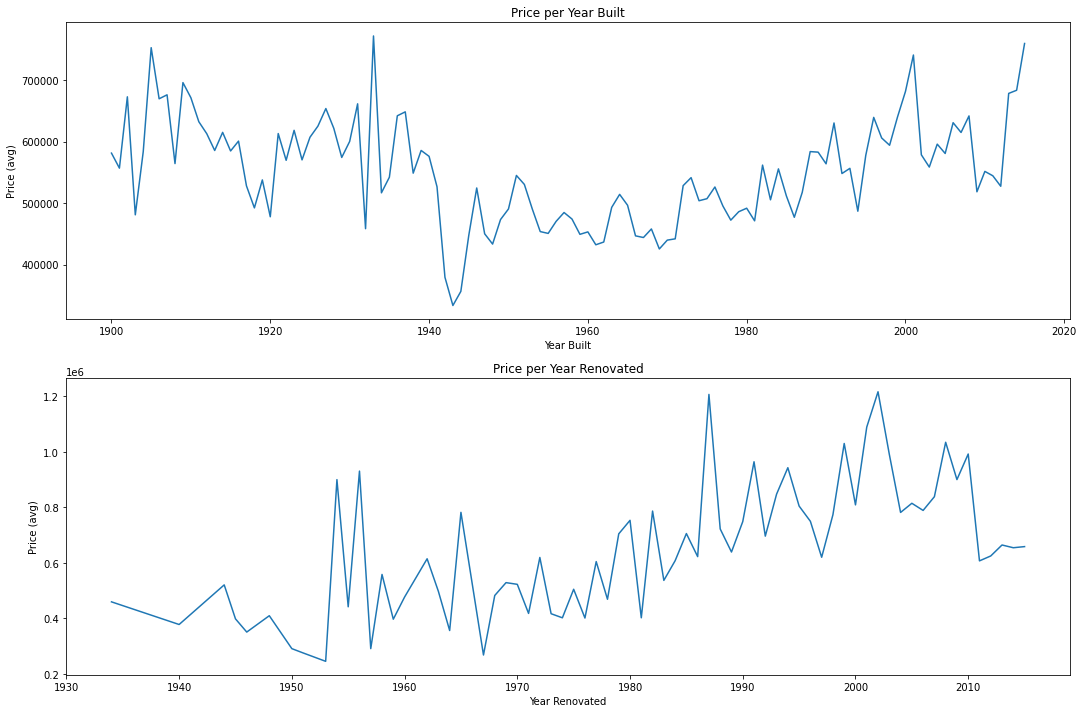

In [ ]:
fig = plt.figure(figsize=(18, 12))
specs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, :])

# First Graph
ax1.plot(avgprice_yrbuilt.year_built, avgprice_yrbuilt.price)
ax1.set_xlabel('Year Built')
ax1.set_ylabel('Price (avg)')
ax1.set_title('Price per Year Built')

# Second Graph
ax2.plot(price_evolution.year_reno, price_evolution.price)
ax2.set_xlabel('Year Renovated')
ax2.set_ylabel('Price (avg)')
ax2.set_title('Price per Year Renovated')

fig.show()

### Faça um gráfico (mapa) com o tamanho dos pontos sendo igual ao tamanho da sala de estar

In [ ]:
df_map = data[['id', 'lat', 'long', 'price', 'sqft_living']]

fig = plt.figure(figsize=(10, 6))
fig = px.scatter_mapbox(  df_map,
                          lat='lat',
                          lon='long',
                          hover_data=['price'],
                          hover_name='id',
                          size='sqft_living',
                          zoom=8,
                          height=300,
                          color_continuous_scale=px.colors.cyclical.IceFire
                        )

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=600, margin={'r':0,'t':0, 'l':0, 'b':0})
fig.show()

<Figure size 720x432 with 0 Axes>

# Aula 04

## Exercícios propostos

1. Qual a quantidade de imóveis por nível?
  - nivel_0 = preço menor que 321950
  - nivel_1 = preço maior ou igual a 321950 e menor que 450000
  - nivel_2 = preço maior ou igual a 450000 e menor que 645000
  - nivel_3 = preço maior ou igual a 645000

2. Qual a média do tamanho da sala de estar dos imóveis por "size"?
  - size: 0 = tamanho da sala de estar menor que 1427
  - size: 1 = tamanho da sala de estar maior ou igual a 1427 e menor que 1910
  - size: 2 = tamanho da sala de estar maior ou igual a 1910 e menor que 2550
  - size: 3 = tamanho da sala de estar maior ou igual a 2550

3. Adicione as seguintes informações ao conjunto de dados original:
  - Place ID: Identificação da localização
  - OSM type: Open Street Map Type
  - Country: Nome do País
  - Country Code: Código do País

4. Adicione os seguintes filtros no mapa:
  - Tamanho mínimo da área da sala de estar
  - Número mínimo de banheiros
  - Valor máximo do preço
  - Tamanho máximo da área do porão
  - Filtro das condições do imóvel
  - Filtro por ano de construção

5. Adicione os seguintes filtros no Dashboard:
  - Filtro por data disponível para compra
  - Filtro por ano de renovação
  - Filtro se possui vista para água ou não

### Qual a quantidade de imóveis por nível?
  - nivel_0 = preço menor que 321950
  - nivel_1 = preço maior ou igual a 321950 e menor que 450000
  - nivel_2 = preço maior ou igual a 450000 e menor que 645000
  - nivel_3 = preço maior ou igual a 645000

In [ ]:
n0_max = 321950
n1_max = 450000
n2_max = 645000

data['nivel'] = data['price'].apply(lambda x:
                                    'nivel_0' if x < n0_max else
                                    'nivel_1' if (x >= n0_max) & (x < n1_max) else
                                    'nivel_2' if (x >= n1_max) & (x < n2_max) else
                                    'nivel_3'
                                    )

data[['id', 'price', 'nivel']].head()

,id,price,nivel
0,7129300520,221900.00,nivel_0
1,6414100192,538000.00,nivel_2
2,5631500400,180000.00,nivel_0
3,2487200875,604000.00,nivel_2
4,1954400510,510000.00,nivel_2


In [ ]:
data['nivel'].value_counts()

nivel_2    5508
nivel_3    5413
nivel_0    5403
nivel_1    5289
Name: nivel, dtype: int64

### Qual a média do tamanho da sala de estar dos imóveis por "size"?

- size: 0 = tamanho da sala de estar menor que 1427
- size: 1 = tamanho da sala de estar maior ou igual a 1427 e menor que 1910
- size: 2 = tamanho da sala de estar maior ou igual a 1910 e menor que 2550
- size: 3 = tamanho da sala de estar maior ou igual a 2550

In [ ]:
s0_max = 1427
s1_max = 1910
s2_max = 2550

data['size'] = data['sqft_living'].apply(lambda x:
                                         0 if x < s0_max else
                                         1 if (x >= s0_max) & (x < s1_max) else
                                         2 if (x >= s1_max) & (x < s2_max) else
                                         3
                                         )
data[['id', 'sqft_living', 'size']].head()

,id,sqft_living,size
0,7129300520,1180,0
1,6414100192,2570,3
2,5631500400,770,0
3,2487200875,1960,2
4,1954400510,1680,1


In [ ]:
by_size = data[['size', 'sqft_living']].groupby('size').mean().reset_index()
by_size

,size,sqft_living
0,0,1123.78
1,1,1661.20
2,2,2202.70
3,3,3318.99


### Adicione as seguintes informações ao conjunto de dados original:

- Place ID: Identificação da localização
- OSM type: Open Street Map Type
- Country: Nome do País
- Country Code: Código do País

In [ ]:
data.loc[254, ['lat', 'long']].to_list()

[47.3507, -122.178]

In [ ]:
geolocator = Nominatim(user_agent='geopi_sudc')

response = geolocator.reverse('47.3507, -122.178')

response.raw

{'address': {'country': 'United States',
  'country_code': 'us',
  'county': 'King County',
  'house_number': '28015',
  'postcode': '98030',
  'road': '122nd Place Southeast',
  'state': 'Washington',
  'town': 'Kent'},
 'boundingbox': ['47.3505783', '47.3507074', '-122.1782365', '-122.1780162'],
 'display_name': '28015, 122nd Place Southeast, Kent, King County, Washington, 98030, United States',
 'lat': '47.350626399999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '-122.17812173685628',
 'osm_id': 638073564,
 'osm_type': 'way',
 'place_id': 218910507}

In [ ]:
data['place_id'] = 'NA'
data['osm_type'] = 'NA'
data['country'] = 'NA'
data['country_code'] = 'NA'

geolocator = Nominatim(user_agent='geopi_sudc')

#for i in range(len(data)):
for i in range(10):
  latlon = str(data.loc[i, 'lat']) + ',' + str(data.loc[i, 'long'])

  response = geolocator.reverse(latlon)

  if 'place_id' in response.raw:
    data.loc[i, 'place_id'] = response.raw['place_id']

  if 'osm_type' in response.raw:
    data.loc[i, 'osm_type'] = response.raw['osm_type']

  if 'country' in response.raw['address']:
    data.loc[i, 'country'] = response.raw['address']['country']

  if 'country_code' in response.raw['address']:
    data.loc[i, 'country_code'] = response.raw['address']['country_code']

data[['id', 'lat', 'long', 'place_id', 'osm_type', 'country', 'country_code']].head(10)

,id,lat,long,place_id,osm_type,country,country_code
0,7129300520,47.51,-122.26,148348822,way,United States,us
1,6414100192,47.72,-122.32,149083775,way,United States,us
2,5631500400,47.74,-122.23,76196034,node,United States,us
3,2487200875,47.52,-122.39,145876576,way,United States,us
4,1954400510,47.62,-122.05,294171046,way,United States,us
5,7237550310,47.66,-122.00,159763472,way,United States,us
6,1321400060,47.31,-122.33,221393802,way,United States,us
7,2008000270,47.41,-122.31,221732259,way,United States,us
8,2414600126,47.51,-122.34,222458584,way,United States,us
9,3793500160,47.37,-122.03,210156012,way,United States,us


### Adicione os seguintes filtros no mapa:

- Tamanho mínimo da área da sala de estar
- Número mínimo de banheiros
- Valor máximo do preço
- Tamanho máximo da área do porão
- Filtro das condições do imóvel
- Filtro por ano de construção

In [ ]:

# Convertion: 1 m => 3,28084 ft
conv_value = 3.28084
data['m_living_room'] = data['sqft_living'].apply(lambda x: round(x / conv_value, 0)).astype(int)
data['m_basement'] = data['sqft_basement'].apply(lambda x: round(x / conv_value, 0)).astype(int)

style = {'description-width': 'initial'}

# Set values Button 1
avg_bt1 = data['m_living_room'].mean()
min_bt1 = data['m_living_room'].min()
max_bt1 = data['m_living_room'].max()
dsc_bt1 = 'Minimum living room size (m)'

# Set values Button 2
avg_bt2 = data['bathrooms'].mean()
min_bt2 = data['bathrooms'].min()
max_bt2 = data['bathrooms'].max()
dsc_bt2 = 'Minimum number of bathrooms'

# Set values Button 3
avg_bt3 = data['price'].mean()
min_bt3 = data['price'].min()
max_bt3 = data['price'].max()
dsc_bt3 = 'Maximum price'

# Set values Button 4
avg_bt4 = data['m_basement'].mean()
min_bt4 = data['m_basement'].min()
max_bt4 = data['m_basement'].max()
dsc_bt4 = 'Maximum basement size (m)'

# Set values Button 5
sel_bt5 = data['condition_type'].sort_values().unique().tolist()
dsc_bt5 = 'House condition'
dft_bt5 = sel_bt5[-1]

# Set values Button 6
sel_bt6 = data['year_built'].sort_values(ascending=False).unique().tolist()
dsc_bt6 = 'Year built'
dft_bt6 = sel_bt6[0]

# First Button
min_living_room_size = widgets.IntSlider(
    value=avg_bt1,
    min=min_bt1,
    max=max_bt1,
    step=1,
    description=dsc_bt1,
    disable=False,
    style=style
)

# Second Button
min_bathrooms = widgets.IntSlider(
    value=avg_bt2,
    min=min_bt2,
    max=max_bt2,
    step=1,
    description=dsc_bt2,
    disable=False,
    style=style
)

# Third Button
max_price = widgets.IntSlider(
    value=avg_bt3,
    min=min_bt3,
    max=max_bt3,
    step=1,
    description=dsc_bt3,
    disable=False,
    style=style
)

# Fourth Button
max_basement_size = widgets.IntSlider(
    value=avg_bt4,
    min=min_bt4,
    max=max_bt4,
    step=1,
    description=dsc_bt4,
    disable=False,
    style=style
)

# Fifth  Button
sel_condition_type = widgets.Dropdown(
    options=sel_bt5,
    value=dft_bt5,
    description=dsc_bt5,
    disable=False,
    style=style
)

# Sixth Button
sel_yr_built = widgets.Dropdown(
    options=sel_bt6,
    value=dft_bt6,
    description=dsc_bt6,
    disable=False,
    style=style
)

In [ ]:
def update_map(df, min_living_room_size_limit, min_bathrooms_limit, max_price_limit, max_basement_size_limit, sel_condition_type_defined, sel_yr_built_defined):
  df_map = df[
              (df['m_living_room'] >= min_living_room_size_limit) &
              (df['bathrooms'] >= min_bathrooms_limit) &
              (df['price'] <= max_price_limit) &
              (df['m_basement'] <= max_basement_size_limit) &
              (df['condition_type'] == sel_condition_type_defined) &
              (df['year_built'] <= sel_yr_built_defined)
  ]

  fig = px.scatter_mapbox(
      df_map,
      lat='lat',
      lon='long',
      color='nivel',
      size='price',
      color_continuous_scale=px.colors.cyclical.IceFire,
      size_max=15,
      zoom=9
  )

  fig.update_layout(mapbox_style='open-street-map')
  fig.update_layout(height=600, width=1500, margin={'r':0, 'l':0, 't':0, 'b':0})
  fig.show()

In [ ]:
widgets.interactive(
    update_map,
    df=fixed(data),
    min_living_room_size_limit = min_living_room_size,
    min_bathrooms_limit = min_bathrooms,
    max_price_limit = max_price,
    max_basement_size_limit = max_basement_size,
    sel_condition_type_defined = sel_condition_type,
    sel_yr_built_defined = sel_yr_built
)

interactive(children=(IntSlider(value=633, description='Minimum living room size (m)', max=4127, min=88), IntS…

### Adicione os seguintes filtros no Dashboard:
  - Filtro por data disponível para compra
  - Filtro por ano de renovação
  - Filtro se possui vista para água ou não

In [ ]:
data['available_year'] = pd.to_datetime(data['date']).dt.strftime('%Y')
data['available_year_month'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m')
data['is_waterfront'] = data['waterfront'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Button 1 settings
sel_bt1 = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d').sort_values().unique()
min_bt1 = sel_bt1.min()
dsc_bt1 = 'Available in:'

# Button 2 settings
sel_bt2 = pd.to_datetime(data['yr_renovated']).dt.strftime('%Y').sort_values().unique()
min_bt2 = data['year_reno'].min()
dsc_bt2 = 'Renovated in:'

# Button 3 settings
sel_bt3 = data['is_waterfront'].unique().tolist()
sel_bt3.append('Both')
sel_bt3.sort()
dft_bt3 = sel_bt3[0]
dsc_bt3 = 'Is waterfront?'

# First Button
min_available_date = widgets.SelectionSlider(
    options=sel_bt1,
    value=min_bt1,
    description=dsc_bt1,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Second Button
min_yr_reno = widgets.IntSlider(
    options=sel_bt2,
    value=min_bt2,
    description=dsc_bt2,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Third Button
sel_waterfront = widgets.Dropdown(
    options=sel_bt3,
    value=dft_bt3,
    description=dsc_bt3,
    disable=False
)

In [ ]:
def update_map(df, min_available_date_limit, min_yr_reno_limit, sel_waterfront_defined):

  data = df[
            (df['date'] >= min_available_date_limit) &
            (df['year_reno'] >= min_yr_reno_limit) &
            ((df['is_waterfront'] == sel_waterfront_defined) | ('Both' == sel_waterfront_defined))
  ]

  fig = plt.figure(figsize=(25, 12))
  specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

  ax1 = fig.add_subplot(specs[0, :])
  ax2 = fig.add_subplot(specs[1, 0])
  ax3 = fig.add_subplot(specs[1, 1])

  by_year_month = data[['price', 'available_year_month']].groupby('available_year_month').mean().reset_index()
  ax1.plot(by_year_month['available_year_month'], by_year_month['price'])
  ax1.set_title('Price per Month')
  ax1.set_xlabel('Available Month')
  ax1.set_ylabel('Price (sum)')

  dormitoty_type = data[['id', 'dormitory_type']].groupby('dormitory_type').count().reset_index()
  ax2.bar(dormitoty_type['dormitory_type'], dormitoty_type['id'])
  ax2.set_title('Dormitory Type')
  ax2.set_xlabel('Dormitory Type')
  ax2.set_ylabel('Number of Houses')

  condition_type = data[['id', 'condition_type']].groupby('condition_type').count().reset_index()
  ax3.bar(condition_type['condition_type'], condition_type['id'])
  ax3.set_title('Condition Type')
  ax3.set_xlabel('Condition Type')
  ax3.set_ylabel('Number of Houses')

  fig.show()

In [ ]:
widgets.interactive(
    update_map,
    df=fixed(data),
    min_available_date_limit=min_available_date,
    min_yr_reno_limit=min_yr_reno,
    sel_waterfront_defined=sel_waterfront
)

interactive(children=(SelectionSlider(continuous_update=False, description='Available in:', options=('2014-05-…